<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-данных" data-toc-modified-id="Изучение-общей-информации-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Ответы-на-вопросы" data-toc-modified-id="Ответы-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответы на вопросы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование надёжности заёмщиков

Заказчик настоящего исследования — кредитный отдел банка. Требуется разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Изучаемые данные содержат статистику о платежеспособности клиентов и представлены датасетом, содержащим следующие столбцы:
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита


## Изучение общей информации о данных

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')

In [2]:
from pymystem3 import Mystem
m = Mystem()

In [3]:
from collections import Counter

Изучим первые 10 строк таблицы. Согласно документации, датасет содержит следующую информацию о клиентах:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

In [4]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Проблемы, связанные с оформлением данных:
* отрицательные значения в колонке с трудовым стажем
* явно неверные значения в колонке с трудовым стажем 340266 дней - 932 года
* различается форматирование текста в строках столбца с данными об образовании
* в колонке с ежемесячным доходом и со стажем трудоустройства использован вещественный тип переменных, тогда как более удобным является целочисленный
* различаются обозначения цели в случае покупки жилья в колонке с данными о цели получения кредита 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Из общей информации видно, что имеются пропуски в данных о трудовом стаже и доходах клиентов. В ходе исследования надо изучить в том числе влияние уровня доходов на факт погашения кредита. Следовательно наличие пропусков может повлиять на результаты исследования. 

Количество пропусков в столбцах с трудовым стажем и уровнем дохода совпадает. Предварительно можно предположить, что данные о доходах отсутствуют у клиентов, которые ранее не работали.

**Вывод**

Таблица содержит достаточно информации о клиентах банка для проведения анализа и выявления закономерностей в поведении.

Однако часть данных пропущена, содержание некоторых столбцов необходимо привести к единому формату, имеются дублирующие друг друга значения. Также требуется устранить ошибки в содержании некоторых строк.

Так как неверная информация может повлиять на результаты исследования, датасет надо предварительно обработать.

## Предобработка данных

### Обработка пропусков

In [6]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Чтобы проверить предположение о том, что данные о доходе и трудовом стаже пропущены для тех клиентов, которые ранее не работали, отфильтруем данные с пропусками.

In [7]:
df.loc[df['days_employed'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Видно, что данные о стаже и доходе не занесены в одних и тех же строках. Посчитаем, совпадает ли количество таких строк с общим количеством пропусков.

In [8]:
len(df.loc[df['days_employed'].isna()&df['total_income'].isna()])

2174

Предположение о том, что данные не занесены для какой-либо конкретной категории клиентов не подтверждается. В таблице представлены клиенты разных возрастов. Для некоторых в в столбце с типом занятости указано, что они в настоящее время трудоустроены. 
Однако данные о доходе и стаже пропущены в одних и тех же строках, т.е. закономерность заключается в том, что эти ячейки не заполняли в одинаковых случаях. Возможно это был один и тот же ответственный за заполнение таблицы работник.

Можно заполнить данные о доходе и о стаже медианным значением.

Посчитаем медианное значение для стажа работы. Поскольку в столбце встречаются значения, явно не соответствующие действительности, среднее значение не подойдет. Так как в части ячеек указаны отрицательные значения, будем брать значение ячейки по модулю.

Выведем гистограмму для изучения распределения значений.

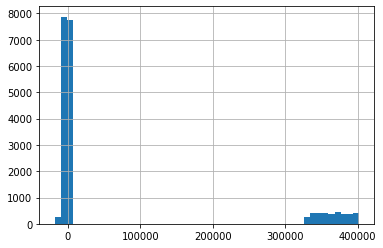

In [9]:
some_df = pd.read_csv('/datasets/data.csv')
some_df.days_employed.hist(bins=50)

Если предположить, что максимальный доступный человеку трудовой стаж составляет 70 лет, то максимальное количество дней стажа составит примерно 25500. 
Т.к. в таблице есть значения в сотнях тысяч дней, можно предположить, что в части случаев при занесении перед значением ставили знак тире (минус), а в других случаях - лишний 0.

Посчитаем медиану только для значений меньше 25500 дней.

In [10]:
days_emloyed_median = df.loc[df['days_employed']<25500, 'days_employed'].abs().median()
days_emloyed_median

1630.0193809778216

Заполним пропуски медианным значением и посчитаем количество пропусков.

In [11]:
df.loc[df['days_employed'].isna(), 'days_employed'] = days_emloyed_median
df['days_employed'].isna().sum()

0

Теперь необходимо заполнить пропуски в столбце с заработком. Посчитаем медианное значение дохода отдельно для пенсионеров и отдельно для клиентов среднего возраста и заполним пропуски.

In [12]:
retiree_data = df.loc[df['income_type']=='пенсионер']
retiree_data_income_median = retiree_data['total_income'].median()
retiree_data_income_median

118514.48641164352

In [13]:
middleaged_data = df.loc[df['income_type']!='пенсионер']
middleaged_data_income_median = middleaged_data['total_income'].median()
middleaged_data_income_median

151134.59347874188

Считаю нужным оставить обе полученных переменных, т.к. разброс в 30000 руб. может быть существенным для банка при принятии решения о выдаче кредита.
Заполняем пропуски отдельно для пенсионеров и отдельно для клиентов среднего возраста.

In [14]:
df.loc[(df['total_income'].isna()&(df['income_type']=='пенсионер')), 'total_income'] = retiree_data_income_median
df.loc[(df['total_income'].isna()&(df['income_type']!='пенсионер')), 'total_income'] = middleaged_data_income_median

Проверим количество пропусков в таблице после заполнения.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Пропуски в таблице встречаются в одних и тех же строках. Можно предположить, что они появились из-за ошибки заполнения. Поэтому пропуски были заполнены медианным значением о стаже работы и медианным значением о доходе (в последнем случае с разбивкой по возрастным группам).

### Замена типа данных

Данные в колонках о стаже и доходе заполнены вещественными переменными, которые выглядят громоздко. Значение после запятой не должно повлиять на результаты анализа. Заменим данные в этих столбцах на целочисленные переменные.

В колонке с данными об образовании использованы разные регистры. Приведем все значения в этом столбце к нижнему регистру.

Колонка о стаже: изменим тип переменных, а в ячейках, где стаж указан с отрицательным значением, изменим его на положительное.

In [16]:
df['days_employed'] = df['days_employed'].astype('int').abs()

Колонка о доходе

In [17]:
df['total_income'] = df['total_income'].astype('int')

Колонка с данными об образовании.

In [18]:
df['education'] = df['education'].str.lower()

Проверим также на наличие ошибок колонку с данными о детях.

In [19]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Требуется убрать - в 47 случаях. Также в 76 случаях указано 20 детей. Попробуем проверить строки таблицы с этим значением.

In [20]:
df.loc[df['children']==20].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,880,21,среднее,1,женат / замужем,0,M,компаньон,0,145334,покупка жилья
720,20,855,44,среднее,1,женат / замужем,0,F,компаньон,0,112998,покупка недвижимости
1074,20,3310,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518,получение образования
2510,20,2714,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474,операции с коммерческой недвижимостью
2941,20,2161,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739,на покупку автомобиля


Так как здесь явно допущена ошибка, а 65 человек с 20 детьми могут повлиять на результаты для группы многодетных, заменим 20 детей на 2 для этой группы. 

Остается исправить отрицательные значения в колонке.

In [21]:
df.loc[(df['children']==20), 'children'] = 2

In [22]:
df['children'].value_counts()

 0    14149
 1     4818
 2     2131
 3      330
-1       47
 4       41
 5        9
Name: children, dtype: int64

Остается исправить отрицательные значения в колонке.

In [23]:
df['children'] = df['children'].abs()

Проверим таблицу после изменений.

In [24]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


**Вывод**

После изменения типа переменных данные в колонках о доходе, трудовом стаже и об образовании выглядят более легкими для восприятия. Также исправлены данные в колонке о количестве детей.

### Обработка дубликатов

Сначала выясним количество дубликатов для всей таблицы.

In [25]:
df.duplicated().sum()

71

Удалим явные дубликаты и проверим результат применения метода.

In [26]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

Для поиска неявных дубликатов используем столбец с данными о цели кредита. Проверим уникальные значения столбца.

In [27]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Вывод**

Для таблицы размером более 20000 строк, 50 дубликатов составляют менее 1%. Такое количество дублированных строк не могло существенным образом повлиять на вывод, однако они были удалены для получения более точного результата. 

Что же касается столбца с указанием цели кредита, значения в нем необходимо привести к единому формату. Для этого удобнее использовать лемматизацию, т.к. количество уникальных значений достаточно велико.

### Лемматизация

Проверим количество уникальных значений столбца с данными о цели кредита для принятия решения о замене.

In [28]:
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Очевидные цели кредита, в которых не прослеживается дополнительных подкатегорий - это образование, свадьба и сделки с автомобилем. 

Большинство клиентов берут кредит для осуществления сделок с недвижимостью. Во многих случаях не конкретизировано, для каких целей приобретается недвижимость. Выделим категории "покупка жилья" - для тех случаев, где это прямо указано, - и "недвижимость" - сюда включим коммерческую недвижимость.

При замене исключим из выборки "ремонт жилью", т.к. это не относится к сделкам с недвижимостью, а 600 строк могут повлиять на результат.

Объединим уникальные значения столбца с назначением кредита, чтобы убедиться в верном выборе лемм.

In [29]:
Counter(m.lemmatize(' '.join(df['purpose'].unique())))

Counter({'покупка': 10,
         ' ': 96,
         'жилье': 7,
         'приобретение': 1,
         'автомобиль': 9,
         'дополнительный': 2,
         'образование': 9,
         'сыграть': 1,
         'свадьба': 3,
         'операция': 4,
         'с': 5,
         'на': 4,
         'проведение': 1,
         'для': 2,
         'семья': 1,
         'недвижимость': 10,
         'коммерческий': 2,
         'жилой': 2,
         'строительство': 3,
         'собственный': 1,
         'подержать': 2,
         'свой': 4,
         'со': 1,
         'заниматься': 2,
         'сделка': 2,
         'получение': 3,
         'высокий': 3,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1,
         '\n': 1})

Напишем функцию для лемматизации и замены значений

In [30]:
def purpose_lemmatize(purpose_value):
    lemmas = ' '.join(m.lemmatize(purpose_value))
    if 'ремонт' in lemmas:
        return 'ремонт'
    elif 'жилье' in lemmas:
        return 'покупка жилья'
    elif 'недвижимость' in lemmas:
        return 'покупка недвижимости'
    elif 'образование' in lemmas:
        return 'образование'
    elif 'свадьба' in lemmas:
        return 'свадьба' 
    elif 'автомобиль' in lemmas:
        return 'сделка с автомобилем'

In [31]:
df['purpose'] = df['purpose'].apply(purpose_lemmatize)

Проверим количество значений после замены.

In [32]:
df['purpose'].value_counts()

покупка недвижимости    6351
сделка с автомобилем    4306
образование             4013
покупка жилья           3853
свадьба                 2324
ремонт                   607
Name: purpose, dtype: int64

**Вывод**

Ожидаемо на первом месте целью для кредита являются операции с недвижимостью, причем как минимум половина из них приходится на покупку жилья.

### Категоризация данных

В предыдущем разделе были упорядочены названия целей взятия кредита. Кроме вопроса о зависимости платежеспособности от цели взятия кредита, необходимо исследовать также зависимость платежеспособности от наличия детей, семейного положения и уровня дохода. 

Из первых строк таблицы видно, что в столбце с данными о **семейном положении** всего 3 уникальных значения. Проверим, так ли это.

In [33]:
df['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Можно объединить более мелкие категории: например "в разводе" и "вдовец / вдова", но оставим пока как есть для получения более подробных результатов.

Следующим разделим на категории столбец с данными о **наличии детей**. Выведем еще раз уникальные значения столбца.

In [34]:
df['children'].value_counts()

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

Сначала напишем функцию для разбивки на категории.

In [35]:
def children_number(children):
    if children == 0:
        return 'нет детей'
    if children == 1:
        return '1 ребенок'
    if children == 2:
        return '2 ребенка'
    return 'многодетный' 

Добавим столбец в таблицу со значениями категорий.

In [36]:
df.insert(1, "children_category", df['children'].apply(children_number))

In [37]:
df.head()

,children,children_category,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,1 ребенок,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,1 ребенок,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,сделка с автомобилем
2,0,нет детей,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,многодетный,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование
4,0,нет детей,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба


Осталось классифицировать клиентов по **уровню дохода**. Проверим минимальное, максимальное и еще раз медианное значения столбца, чтобы решить, на какие группы разбивать данные.

In [38]:
display(df['total_income'].min())

display(df['total_income'].median())

display(df['total_income'].max())

20667

151134.0

2265604

Введем разделение на следующиме группы: от 20 000 до 100 000 - низкий доход, от 100 000 до 200 000 - средний доход, от 200 000 до 500 000 - высокий доход, выше 500 000 - очень высокий доход.

Разбивку проведем по аналогии с предыдущим столбцом: подготовим функцию, которую применим при добавлении нового столбца.

In [39]:
def income_level(income):
    if 20000<=income<100000:
        return 'низкий'
    if 100000<=income<200000:
        return 'средний'
    if 200000<=income<500000:
        return 'высокий'
    return 'очень высокий' 

In [40]:
df.insert(12, "income_level", df['total_income'].apply(income_level))

In [41]:
df.head()

,children,children_category,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,income_level,purpose
0,1,1 ребенок,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,высокий,покупка жилья
1,1,1 ребенок,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,средний,сделка с автомобилем
2,0,нет детей,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,средний,покупка жилья
3,3,многодетный,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,высокий,образование
4,0,нет детей,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,средний,свадьба


**Вывод**

При подготовке данных к исследованию не будет лишним проверить все используемые столбцы датафрейма. Так, при подсчете уникальных значений в столбце о количестве детей выяснилось, что часть данных занесена с ошибкой.

Также в данном разделе видно, как удобно применение функции при добавлении нового столбца одной строкой.

## Ответы на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Посчитаем, сколько клиентов в каждой группе, классифицирующей их в зависимости от наличия детей.

In [42]:
children_category_values = df['children_category'].value_counts().to_frame().reset_index().rename(columns = {'index':'children_category', 'children_category':'people'})
children_category_values

,children_category,people
0,нет детей,14091
1,1 ребенок,4855
2,2 ребенка,2128
3,многодетный,380


Теперь сложим данные в столбце с идентификатором наличия задолженности, чтобы узнать, сколько из клиентов в каждой категории имели задолженность по кредиту.

In [43]:
children_category_sum = df.groupby('children_category')['debt'].sum().sort_values(ascending=False).to_frame().reset_index()
children_category_sum

,children_category,debt
0,нет детей,1063
1,1 ребенок,445
2,2 ребенка,202
3,многодетный,31


Объединим оба датафрейма.

In [44]:
children_category_final = children_category_values.merge(children_category_sum, how='left')
children_category_final

,children_category,people,debt
0,нет детей,14091,1063
1,1 ребенок,4855,445
2,2 ребенка,2128,202
3,многодетный,380,31


Добавим столбец с подсчетом процента должников по кредиту в каждой категории.

In [45]:
children_category_final['percent'] = children_category_final["debt"]/children_category_final["people"]*100
children_category_final.round(2)

,children_category,people,debt,percent
0,нет детей,14091,1063,7.54
1,1 ребенок,4855,445,9.17
2,2 ребенка,2128,202,9.49
3,многодетный,380,31,8.16


**Вывод**

Можно сделать вывод, что с появлением детей растет и процент должников по кредиту, но для многодетных данный процент наоборот меньше.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Произведем аналогичные расчеты. Сначала подсчитаем количество человек в каждой категории. Потом - количество должников по кредиту в каждой категории.

In [46]:
family_status_final = df.groupby('family_status')['debt'].agg(['count','sum','mean'])
family_status_final

,count,sum,mean
family_status,,,
Не женат / не замужем,2810,274,0.097509
в разводе,1195,85,0.071130
вдовец / вдова,959,63,0.065693
гражданский брак,4151,388,0.093471
женат / замужем,12339,931,0.075452


In [47]:
family_status_final['percent'] = family_status_final["sum"]/family_status_final["count"]*100
family_status_final.round(2).sort_values(by = 'percent')

,count,sum,mean,percent
family_status,,,,
вдовец / вдова,959,63,0.07,6.57
в разводе,1195,85,0.07,7.11
женат / замужем,12339,931,0.08,7.55
гражданский брак,4151,388,0.09,9.35
Не женат / не замужем,2810,274,0.10,9.75


**Вывод**

Меньше всего должников по кредиту у тех, кто раньше был в браке. Больше всего - у тех кто не в браке. В целом какой-либо устойчивой зависимости не наблюдается.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Выше столбец с уровнем дохода был разбит на категории. Сформируем сводную таблицу с процентами по этому столбцу.

In [48]:
income_level_values = df['income_level'].value_counts().to_frame().reset_index().rename(columns = {'index':'income_level', 'income_level':'people'})
income_level_sum = df.groupby('income_level')['debt'].sum().sort_values(ascending=False).to_frame().reset_index()
income_level_final = income_level_values.merge(income_level_sum, how='left')
income_level_final['percent'] = income_level_final["debt"]/income_level_final["people"]*100
income_level_final.round(2).sort_values(by = 'percent').reset_index(drop=True)

,income_level,people,debt,percent
0,очень высокий,222,14,6.31
1,высокий,4844,344,7.10
2,низкий,4463,354,7.93
3,средний,11925,1029,8.63


**Вывод**

Чаще всего должниками по кредиту становятся клиенты со средним уровнем дохода. Имеющие высокий уровень дохода клиенты лучше выплачивают кредит, но берут кредит также значительно реже по сравнению со средним классом.

- Как разные цели кредита влияют на его возврат в срок?

In [49]:
purpose_values = df['purpose'].value_counts().to_frame().reset_index().rename(columns = {'index':'purpose', 'purpose':'people'})
purpose_sum = df.groupby('purpose')['debt'].sum().sort_values(ascending=False).to_frame().reset_index()
purpose_final = purpose_values.merge(purpose_sum, how='left')
purpose_final['percent'] = purpose_final["debt"]/purpose_final["people"]*100
purpose_final.round(2).sort_values(by = 'percent').reset_index(drop=True)

,purpose,people,debt,percent
0,ремонт,607,35,5.77
1,покупка жилья,3853,273,7.09
2,покупка недвижимости,6351,474,7.46
3,свадьба,2324,186,8.00
4,образование,4013,370,9.22
5,сделка с автомобилем,4306,403,9.36


**Вывод**

Самой рискованной целью выдачи кредита для банка является сделка с автомобилем. Клиенты, берущие кредит на цели, связанные с недвижимостью, наоборот более надежные.

## Общий вывод

На основе выборки можно построить модель определения возможного риска выдачи кредита для конкретного клиента. Для примера можно написать простую функцию, которая будет считать количество пунктов риска на основании данных таблицы.

Пусть функция прибавляет 1 пункт всем группам клиентов, в которых более 9% должников по кредиту.

In [50]:
def alert_group(row):
    counter = 0
    if row['children_category'] in ['1 ребенок', '2 ребенка']:
        counter+=1
    if row['family_status'] in ['гражданский брак', 'Не женат / не замужем']:
        counter+=1
    if row['purpose'] in ['образование', 'сделка с автомобилем']:
        counter+=1
    if counter==1:
        return 'Низкий риск'
    if counter==2:
        return 'Средний риск'
    if counter==3:
        return 'Высокий риск'

Проверим функцию на первой строке из датафрейма.

In [51]:
row = df.loc[0]
row

children                           1
children_category          1 ребенок
days_employed                   8437
dob_years                         42
education                     высшее
education_id                       0
family_status        женат / замужем
family_status_id                   0
gender                             F
income_type                сотрудник
debt                               0
total_income                  253875
income_level                 высокий
purpose                покупка жилья
Name: 0, dtype: object

Применим функцию к этому ряду.

In [52]:
alert_group(row)

'Низкий риск'

Действительно: счетчик прибавил 1 только по категории "1 ребенок". Значит функция работает.

По основному вопросу исследования о зависимости факта погашения кредита в срок от семейного положения и количества детей можно сделать вывод, что риск для банка ниже в случае, если клиент бездетный и ранее был в браке. С появлением детей и вступлением в брак, в том числе гражданский, риск повышается.